In [36]:
import os
os.chdir('/content/drive/MyDrive/SML_Spring2024/Project_SML')
!pwd

/content/drive/MyDrive/SML_Spring2024/Project_SML


In [37]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('Dataset/data.csv', sep=',',header=0)
df=df.sample(frac=1)
print(df['type_of_shot'])

3741    net shot
6817    net shot
4905    net shot
977         lift
4742    net shot
          ...   
4665    net shot
4883    net shot
5017    net shot
9819       smash
756         lift
Name: type_of_shot, Length: 10348, dtype: object


In [38]:
df = df.drop(columns=['id','frame_count'])
# print(df)
y = df[["type_of_shot"]]
print(y)
X = df.loc[:, df.columns != 'type_of_shot']
print(X.shape)

     type_of_shot
3741     net shot
6817     net shot
4905     net shot
977          lift
4742     net shot
...           ...
4665     net shot
4883     net shot
5017     net shot
9819        smash
756          lift

[10348 rows x 1 columns]
(10348, 34)


In [39]:

# Encode the target variable if it's categorical
ycat=[]
for i in y['type_of_shot']:
  if i=='lift':
    ycat.append(0)
  elif i=='net shot':
    ycat.append(1)
  elif i=='smash':
    ycat.append(2)

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, np.array(ycat), test_size=0.2, random_state=42)

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.5),  # Add dropout with 50% probability
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model_nn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
model_nn.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
130/130 [==============================] - 4s 9ms/step - loss: 2.6298 - accuracy: 0.5378 - val_loss: 0.8943 - val_accuracy: 0.5469
Epoch 2/100
130/130 [==============================] - 1s 8ms/step - loss: 0.8589 - accuracy: 0.5784 - val_loss: 0.8374 - val_accuracy: 0.6150
Epoch 3/100
130/130 [==============================] - 1s 8ms/step - loss: 0.8264 - accuracy: 0.5936 - val_loss: 0.7879 - val_accuracy: 0.6087
Epoch 4/100
130/130 [==============================] - 1s 7ms/step - loss: 0.8049 - accuracy: 0.6096 - val_loss: 0.7808 - val_accuracy: 0.6198
Epoch 5/100
130/130 [==============================] - 1s 5ms/step - loss: 0.7929 - accuracy: 0.6105 - val_loss: 0.8741 - val_accuracy: 0.5899
Epoch 6/100
130/130 [==============================] - 1s 6ms/step - loss: 0.7993 - accuracy: 0.6151 - val_loss: 0.8147 - val_accuracy: 0.6034
Epoch 7/100
130/130 [==============================] - 1s 5ms/step - loss: 0.7856 - accuracy: 0.6163 - val_loss: 0.7426 - val_accuracy: 0.6517

In [40]:
print(model_nn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               4480      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)              

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with your dataset file path
df = pd.read_csv('Dataset/data.csv')
df=df.sample(frac=1)
y = df['type_of_shot']  # Target variable
df = df.drop(columns=['type_of_shot','frame_count','id'])
X = df
# # Extract features (X) and target variable (y)
# X = df.iloc[:, 1:]  # Exclude the first column (type_of_shot) as features
ycat=[]
for i in y:
  if i=='lift':
    ycat.append(0)
  elif i=='net shot':
    ycat.append(1)
  elif i=='smash':
    ycat.append(2)
ycat=np.array(ycat)

# Encode the target variable if it's categorical
# label_encoder = LabelEncoder()
# y['labels'] = label_encoder.fit_transform(y)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ycat, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.6830917874396135


code to extract pose coordinates using yolov7

In [42]:
!pip install moviepy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
import sys
import torch
import time
import datetime

from torchvision import transforms
from PIL import Image
from moviepy.editor import *


%matplotlib inline

In [43]:
os.chdir('/content/drive/MyDrive/SML_Spring2024/Project_SML')
YOLO_DIR = 'yolov7'
if not os.path.exists(YOLO_DIR):
    print("Starting to clone the YoloV7 repo\n")
    !git clone https://github.com/WongKinYiu/yolov7.git
    print("\nDone")

if os.path.exists(YOLO_DIR):
    print("\nDirectory is present:\n")
    !ls yolov7
RESULTS_DIR = 'results'

if not os.path.exists(RESULTS_DIR):
    print("Creating the directory:", RESULTS_DIR)
    os.mkdir(RESULTS_DIR)
    print("Done")

YOLOV7_MODEL_PATH ="https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt"

def get_yolov7_model():
    """
    Download YoloV7 pose estimation model from github
    """
    modelid = YOLOV7_MODEL_PATH

    if not os.path.exists(modelid):
        print("Downloading the model:",
              os.path.basename(modelid), "from:", modelid)
        urllib.request.urlretrieve(modelid,
                                   filename=os.path.basename(modelid))
        print("Done\n")
        !ls yolo*.pt -lh

    if os.path.exists(modelid):
        print("Downloaded model files:")
        !ls yolo*.pt -lh

os.chdir(YOLO_DIR)

from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def image_view(imagefile, w=15, h=10):
    """
    Displaying an image from an image file
    """
    %matplotlib inline
    plt.figure(figsize=(w, h))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(cv2.imread(imagefile),
                            cv2.COLOR_BGR2RGB))
def loading_yolov7_model(yolomodel):
    """
    Loading yolov7 model
    """
    print("Loading model:", yolomodel)
    model = torch.load(yolomodel, map_location=device)['model']
    model.float().eval()

    if torch.cuda.is_available():
        # half() turns predictions into float16 tensors
        # which significantly lowers inference time
        model.half().to(device)

    return model, yolomodel
def running_inference(image):
    """
    Running yolov7 model inference
    """
    image = letterbox(image, 960,
                      stride=64,
                      auto=True)[0]  # shape: (567, 960, 3)
    image = transforms.ToTensor()(image)  # torch.Size([3, 567, 960])

    if torch.cuda.is_available():
        image = image.half().to(device)

    image = image.unsqueeze(0)  # torch.Size([1, 3, 567, 960])

    with torch.no_grad():
        output, _ = model(image)

    return output, image
def draw_keypoints(output, image, confidence=0.25, threshold=0.65):
    """
    Draw YoloV7 pose keypoints
    """
    output = non_max_suppression_kpt(
        output,
        confidence,  # Confidence Threshold
        threshold,  # IoU Threshold
        nc=model.yaml['nc'],  # Number of Classes
        nkpt=model.yaml['nkpt'],  # Number of Keypoints
        kpt_label=True)

    with torch.no_grad():
        output = output_to_keypoint(output)

    nimg = image[0].permute(1, 2, 0) * 255
    nimg = cv2.cvtColor(nimg.cpu().numpy().astype(np.uint8), cv2.COLOR_RGB2BGR)

    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3) #first 7 values are metadata and remaining are the keypoints

    return nimg,output


Directory is present:

cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py  yolov7-w6-pose.pt
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


the first 7 values should be (in order):

batch_id

class_id

x coordinate of the center of the bounding box

y coordinate of the center of the bounding box

w - width of the bounding box

h - height of the bounding box

conf - confidence in the bounding box

In [44]:
!pwd

/content/drive/MyDrive/SML_Spring2024/Project_SML/yolov7


Done

-rw------- 1 root root 154M Apr 17 03:28 yolov7-w6-pose.pt
Loading the model...
Loading model: yolov7-w6-pose.pt
Using the yolov7-w6-pose.pt model
Done
keypoints:  [[          0           0      476.69      308.62       435.5      335.25     0.95696       599.5      198.88     0.99219       601.5      187.38     0.65332       588.5      189.75     0.99414         583       181.5    0.029816         559      189.25     0.86914       517.5      185.25     0.96191         546
       239.12     0.97412         465      186.75     0.91113       596.5       297.5     0.94873       435.5      230.25     0.88721         653      334.25     0.91406         421         293     0.97266      430.75         305     0.97461         401       374.5     0.96826         530       325.5     0.97363
        297.5         386      0.9292         541      443.75     0.93799]]
keypoints shape:  (1, 58)


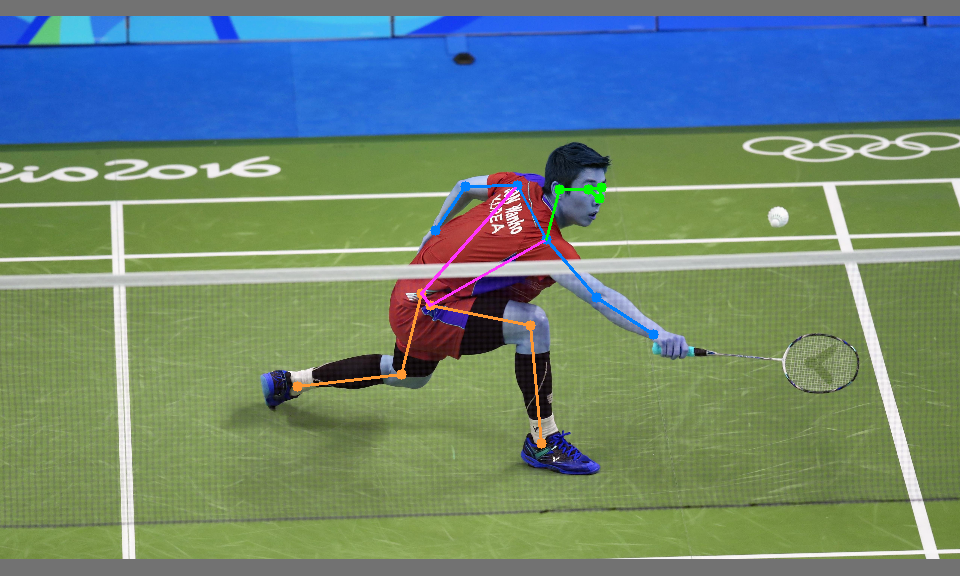

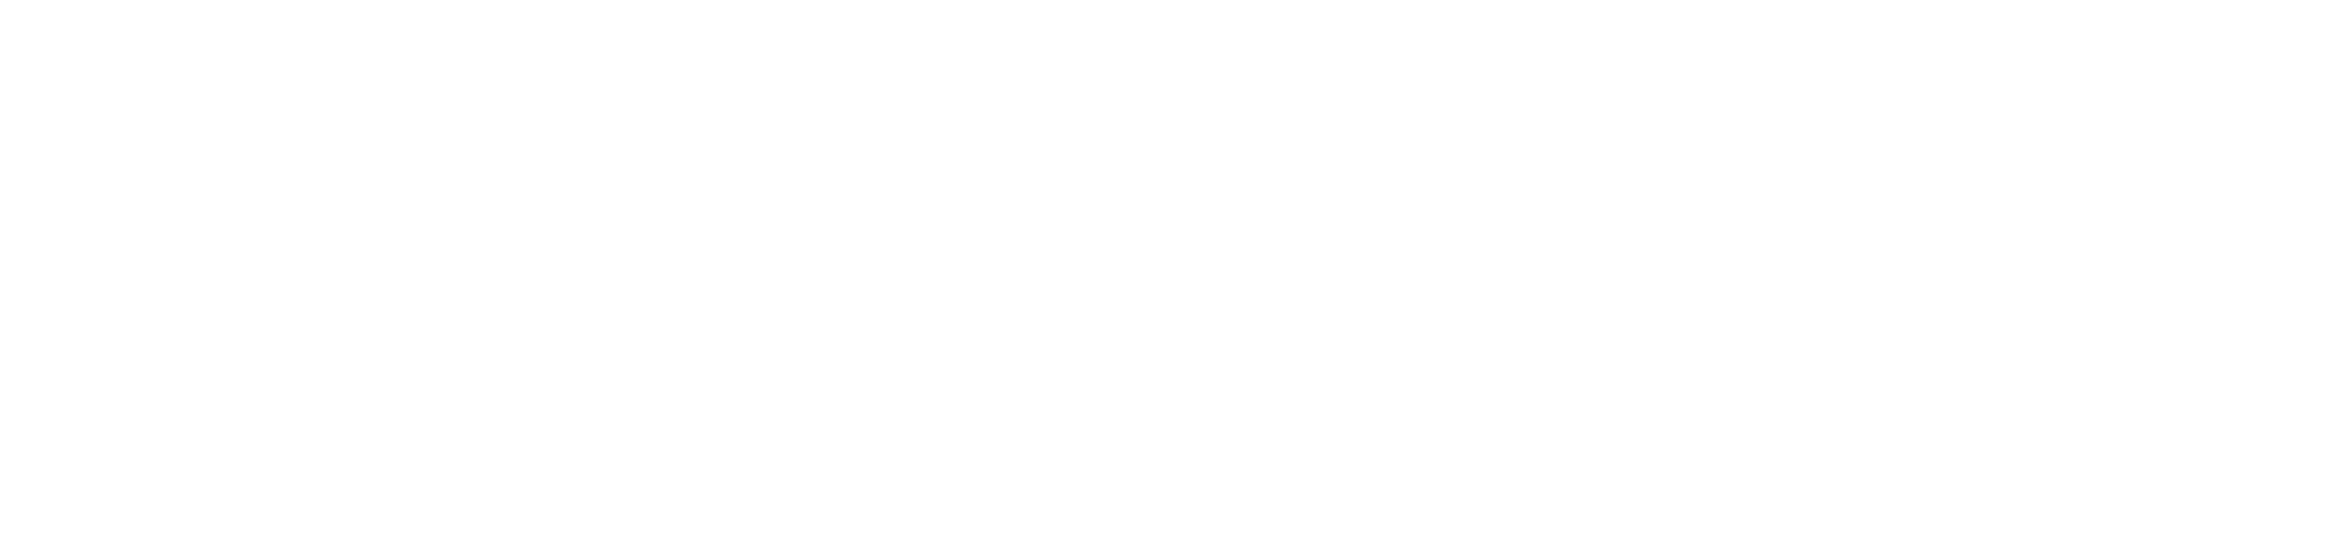

In [45]:
from google.colab.patches import cv2_imshow
get_yolov7_model()
YOLOV7MODEL = os.path.basename(YOLOV7_MODEL_PATH)

try:
    print("Loading the model...")
    model, yolomodel = loading_yolov7_model(yolomodel=YOLOV7MODEL)
    print("Using the", YOLOV7MODEL, "model")
    print("Done")

except:
    print("[Error] Cannot load the model", YOLOV7MODEL)

imagefile = "../pic1.jpg"
output, image = running_inference(cv2.imread(imagefile))
pose_image,keypoints = draw_keypoints(output, image, confidence=0.25, threshold=0.65)
print('keypoints: ',keypoints)
print('keypoints shape: ',keypoints.shape)

plt.figure(figsize=(30, 7))
plt.axis("off")
cv2_imshow(pose_image)

In [46]:
inp=keypoints[0][7:]
new_inp=[]
for index, element in enumerate(inp):
    if (index + 1) % 3 != 0:  # Check if the index is not divisible by 3
        new_inp.append(element)
new_inp=np.array(new_inp)
# model.predict(new_inp)
new_inp=new_inp.reshape((1,34))
print(log_reg.predict(new_inp))

[0]


In [47]:
model_nn.predict(new_inp)

1/1 [==============================] - 0s 99ms/step


array([[ 1.5193e-12,  0.00015907,     0.99984]], dtype=float32)

In [48]:
# !pip install simple_image_download
# from simple_image_download import simple_image_download as simp
# response = simp.simple_image_download
# lst=[]

# response().download("badminton players", 300)

In [49]:
os.chdir('/content/drive/MyDrive/SML_Spring2024/Project_SML/Dataset/badminton players')

In [51]:
folder_dir='/content/drive/MyDrive/SML_Spring2024/Project_SML/Dataset/badminton players'
for imagefile in os.listdir(folder_dir):
  print(imagefile)
  output, image = running_inference(cv2.imread(imagefile))
  pose_image,keypoints = draw_keypoints(output, image, confidence=0.25, threshold=0.65)
  plt.figure(figsize=(30, 7))
  plt.axis("off")
  pose_image=cv2.resize(pose_image, (200, 200))
  cv2_imshow(pose_image)
  inp=keypoints[0][7:]
  new_inp=[]
  for index, element in enumerate(inp):
      if (index + 1) % 3 != 0:  # Check if the index is not divisible by 3
          new_inp.append(element)
  new_inp=np.array(new_inp)
  # model.predict(new_inp)
  new_inp=new_inp.reshape((1,34))
  # print('Logistic regression Prediction: '+log_reg.predict(new_inp))
  print('NN prediction:')
  op=model_nn.predict(new_inp)
  class_op=list(op[0]).index(max(op[0]))
  if class_op==0:
    print('lift')
  elif class_op==1:
    print('net shot')
  elif class_op==2:
    print('smash')

Output hidden; open in https://colab.research.google.com to view.